In [1]:
#input file name
file = 'Details/Cell Counts_Day 8/D3_012.nd2'

In [2]:
#pip install nd2reader

In [3]:
#import packages
import nd2reader
from nd2reader import ND2Reader
import skimage
from skimage import data, io, filters
import matplotlib.pyplot as plt
import numpy.ma as ma
import sys
import numpy as np
from scipy import ndimage as ndi
from skimage import (color, feature, filters, measure, morphology, segmentation, util)
import csv
import imageio
import pandas as pd
import argparse
import configparser



Pixel micron count: 1.625


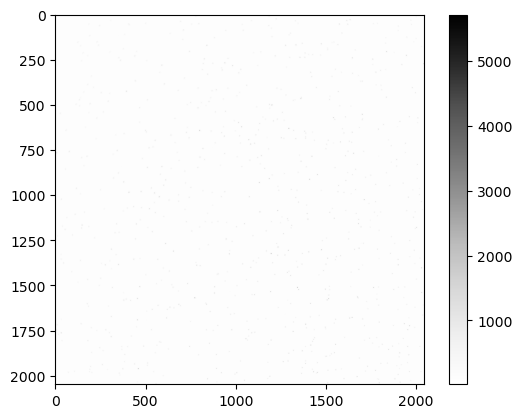

In [4]:
#open the image
with ND2Reader(file) as images:
    plt.imshow(images[0], 'Greys')
    plt.colorbar()
    pixel_microns = images.metadata['pixel_microns']
    
print("Pixel micron count: %s" %pixel_microns)



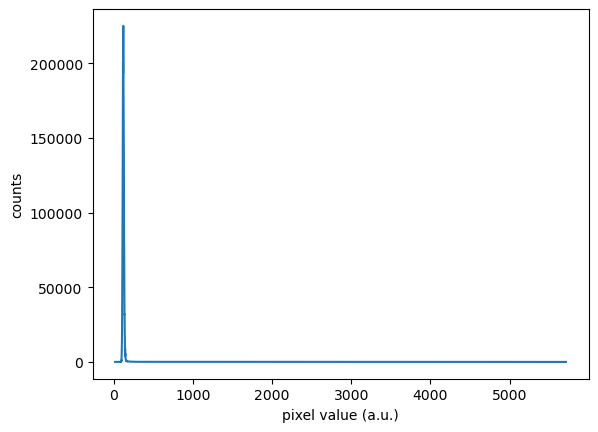

In [5]:
#finding the pixel value of the background by using a histogram
with ND2Reader(file) as images:
   # Generate the histogram of the image. `skimage.exposure.histogram` will return
    # the values of the histogram as well as the centers of the bins.
    hist, bins = skimage.exposure.histogram(images[0])

    # Plot the histogram values versus the bin centers.
    plt.plot(bins, hist)
    plt.xlabel('pixel value (a.u.)')
    plt.ylabel('counts') 
    

Threshold: 250
Number of objects found: 783
Pixel count: 40
Cell Area: 105.625
Approved cells: 755


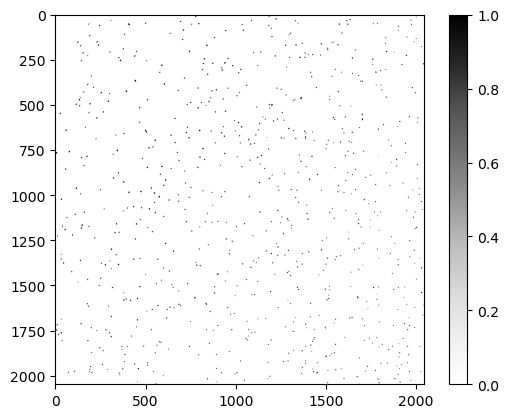

In [6]:
with ND2Reader(file) as images:    
    #set a threshold based off the histogram
    
    #thresh = np.mean(images[0])
    thresh = 250
    print("Threshold: %s" %thresh)
    #segment off the cells by taking away the background
    thresh_im  = images[0] > thresh
    
    plt.imshow(thresh_im, 'Greys')
    plt.colorbar()
    
    np.set_printoptions(threshold=np.inf)
    #count the cells and find the cell area
    im_lab, num_obj = skimage.measure.label(thresh_im, return_num=True)
    cell_pix = np.count_nonzero(im_lab == 10)
    cell_area = cell_pix * pixel_microns**2
    print("Number of objects found: %s" %num_obj)
    print("Pixel count: %s" %cell_pix)
    print("Cell Area: %s" %cell_area)
    
    #find the approved cells based off the area of the cells
    approved_cells = np.zeros_like(thresh_im)
    for i in range(num_obj):
        cell = (im_lab == (i+1))
        currCell_area = np.count_nonzero(cell) * pixel_microns**2
        if (currCell_area > 60) & (currCell_area < 350):
            approved_cells += cell


#show approved cells
    approved_lab, num_obj = skimage.measure.label(approved_cells, return_num=True)
    print("Approved cells: %s" %num_obj)

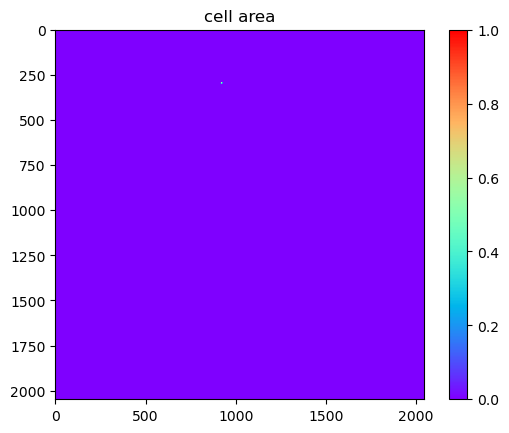

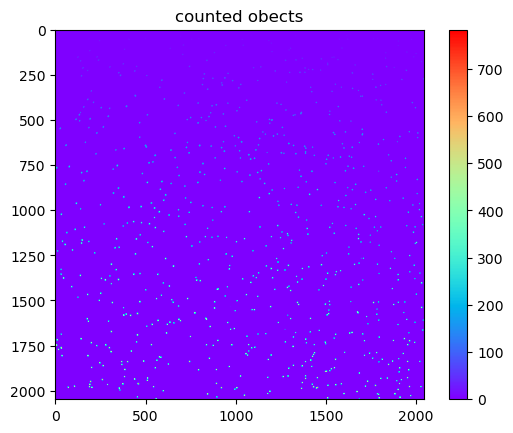

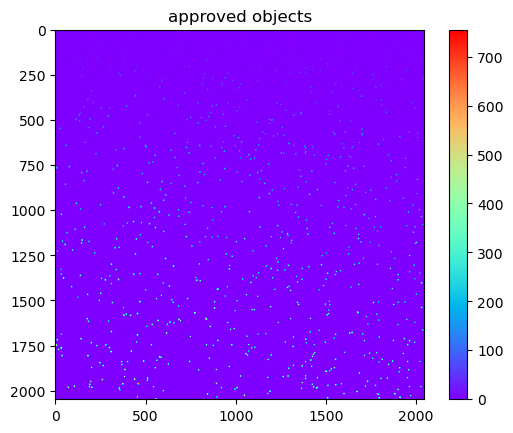

In [7]:
testim = approved_lab == 100
plt.figure()
plt.imshow(testim, cmap='rainbow')
plt.title('cell area')
plt.colorbar()

plt.figure()
plt.imshow(im_lab, cmap='rainbow')
plt.title('counted obects')
plt.colorbar()

plt.figure()
plt.imshow(approved_lab, cmap='rainbow')
plt.title('approved objects')
plt.colorbar()
